In [5]:
# want to store this notebook in the notebooks folder, but want to keep non-relative imports
import os
os.chdir("../..")

In [ ]:
import sys, os, time
import copy
import data, data.gene_datasets
import sklearn, sklearn.model_selection, sklearn.metrics, sklearn.linear_model, sklearn.neural_network, sklearn.tree
import numpy as np
import matplotlib, matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [68]:
genes = """CEBPD
IL5
PABPC3
PSMB10
RPL13
RPL4
RPL5
RPS10
RPS3
S100A8
S100A9
TOP1
C15orf40
RNF138
DLGAP2
EVI2B
ZFP82
MYBL2
PSMB1
CISD1
HLA-B
SAA2
IFIT1
RPS3A
TP53
TNF
EGFR"""

In [7]:
plot_gene = "S100A8"
plot_gene = "IFITM3"
plot_gene = "CEBPD"
plot_gene = "PCCB"
# plot_gene = "RPS10"
#plot_gene = "RPL5"
plot_gene = "S100A8"

In [8]:
filename = "results_S100A8.pkl"

In [9]:
import pickle
results = pickle.load(open(filename, "r"))

In [10]:
#pickle.dump(results, open("results-temp.pkl", "wb"))

In [11]:
#results["df"] = results["df"].replace("wRPL5_CGN_3_layer_64_channel_emb_32_dropout", "CGN_3_layer_64_channel_emb_32_dropout")

In [8]:
#pickle.dump(results, open("results-temp.pkl", "wb"))

In [9]:
import pickle
#pickle.dump(results, open("results-temp.pkl", "wb"))

In [10]:
#results = pickle.load(open("exp-results/results-S100A8.pkl", "r"))

In [11]:
# results["df"]

In [12]:
#q = results["df"][(results["df"].model == "CGN_2_layer_512_channel_emb_512_dropout")]
#q

In [13]:
#results["df"] = results["df"].drop(q.index)

In [14]:
#results["df"].gene_name.unique()

In [15]:
# grouped = results["df"][results["df"].gene_name=="S100A8"].groupby(['gene_name', 'model','train_size','num_genes'])['auc'].agg(['mean','std', 'count'])
# grouped

In [16]:
#results["df"].groupby(['gene_name', 'model','num_genes'])['auc'].mean().groupby(["model"]).plot(legend=True, sharex=True);

In [17]:
#results["df"][(results["df"].gene_name==plot_gene)]

In [18]:
# import pickle
# results = pickle.load(open("results-temp.pkl", "r"))

In [ ]:
for plot_gene in genes.split("\n"):
    import pickle
    results = pickle.load(open("results_" + plot_gene + ".pkl" , "r"))

    %matplotlib inline

    plt.rcParams['figure.figsize'] = (6, 3)
    plot_num_genes = 100

    subset = results["df"][(results["df"].num_genes==plot_num_genes) & 
                          (results["df"].gene_name==plot_gene)]

    q = subset.groupby(['model','train_size'])['auc']

    #for model in ['CGN_2_layer_512_channel_emb_512_dropout', "MLP_2_chan512", "SLR2=lambda10-l1-1"]:#
    for model in sorted(subset["model"].unique()):
        index = q.mean()[model].index
        mean = q.mean()[model]
        stderr = q.std()[model]/np.sqrt(q.count()[model])
        plt.errorbar(index, mean,label=model, xerr=0, yerr=stderr)

    plt.title("Gene Inference " + plot_gene + " (num_genes:" + str(plot_num_genes) +")")
    plt.ylabel("AUC")
    plt.xlabel("Size of training set")
    plt.xscale("log")
    plt.xticks(index)
    formatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.legend();
    plt.savefig("figs/sgi-" + plot_gene + "-" + "ngenes" + str(plot_num_genes) + ".png", bbox_inches='tight')

In [ ]:
results["df"].model.unique()

In [40]:
list(subset["model"].unique()).remove('CGN_lay12_chan128_emb512_dropout_pool')

In [49]:
tcgatissue = data.gene_datasets.TCGATissue()
graph = data.graph.Graph()
path = "/data/lisa/data/genomics/graph/pancan-tissue-graph.hdf5"
#path = "/data/lisa/data/genomics/graph/kegg.hdf5"

graph.load_graph(path)
#graph.intersection_with(tcgatissue)
g = nx.from_numpy_matrix(graph.adj)
mapping = dict(zip(range(0, len(tcgatissue.df.columns)), tcgatissue.df.columns))
g = nx.relabel_nodes(g, mapping)

Converting one-hot labels to integers


In [61]:
#np.dot(graph.adj, graph.adj)

In [ ]:
# for x in g.neighbors(gene):
#     second_degree = second_degree.union(set(g.neighbors(x)))

In [63]:
# withn = []
# for node in g.nodes:
#     n = len(list(g.neighbors(node)))
#     if n > 0:
#         withn.append(n)

In [64]:
# import collections

In [65]:
# (np.asarray(withn)>50).sum()

In [50]:
#collections.Counter(np.asarray(withn))

In [89]:
c = (0.3,1.0)

In [95]:
c[1] - ((c[1]-c[0])*0.5)

0.65

34


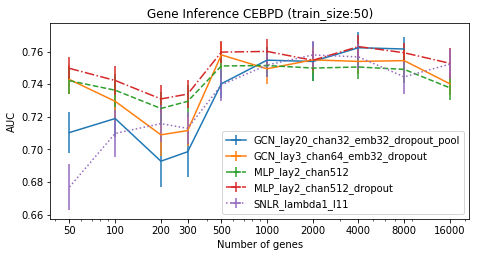

3


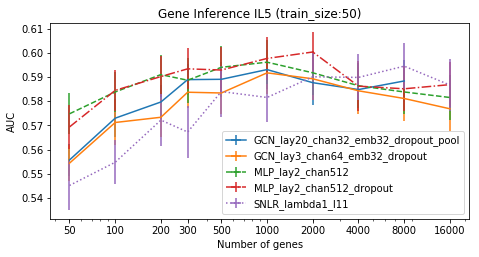

23


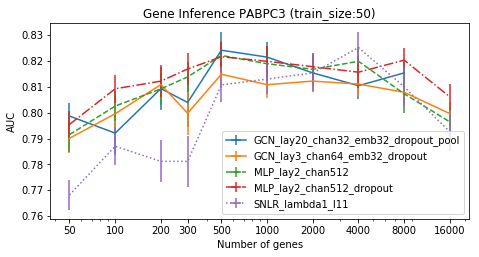

24


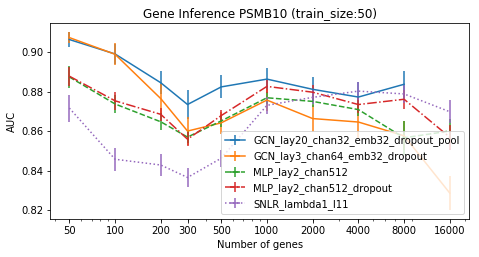

216


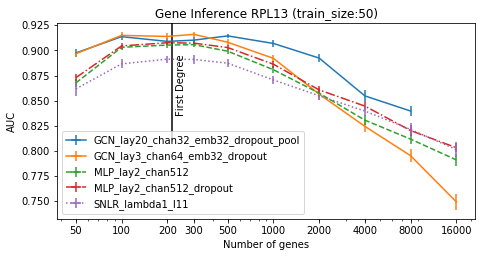

206


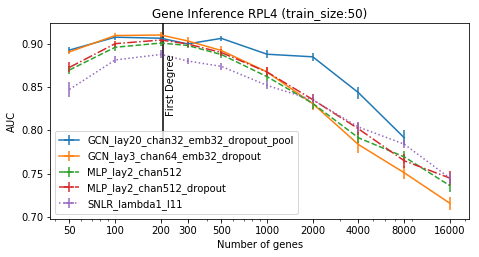

219


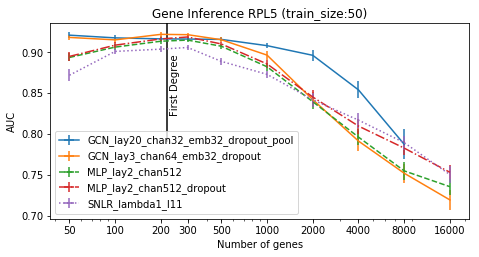

167


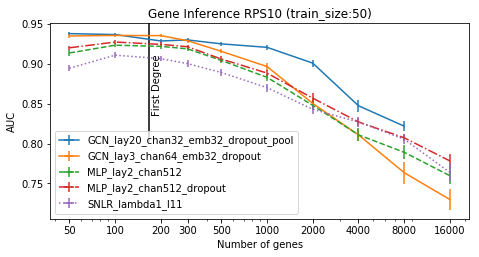

250


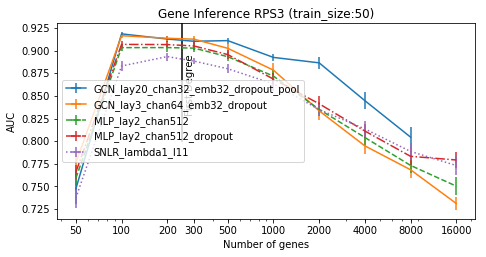

57


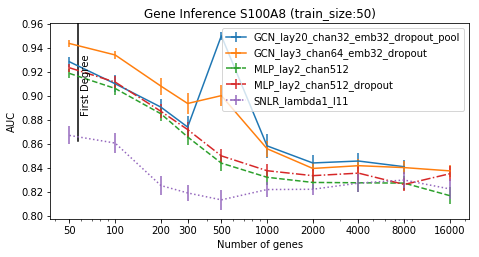

85


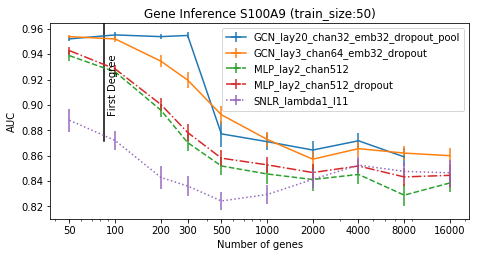

158


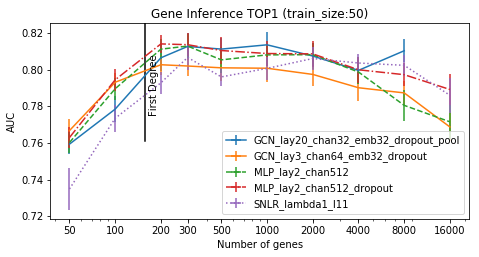

3


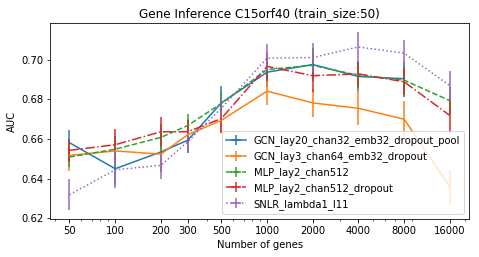

26


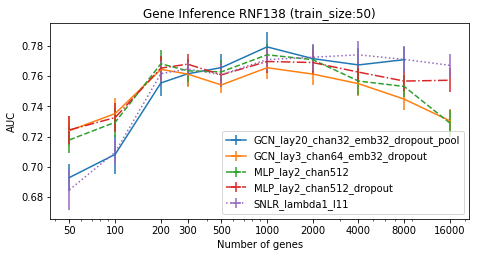

24


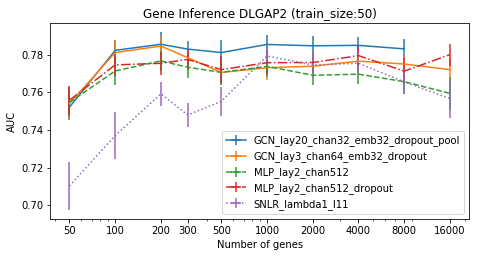

1


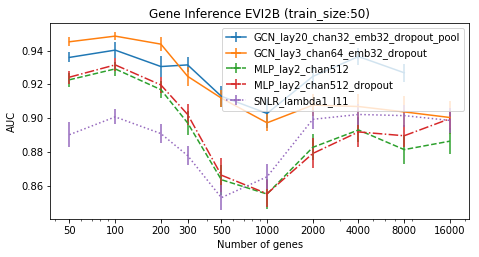

1


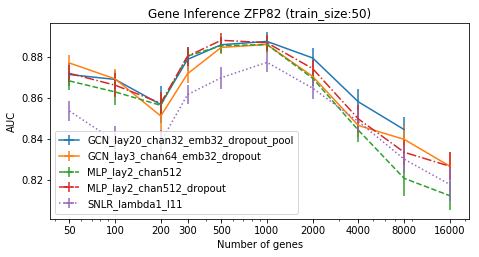

53


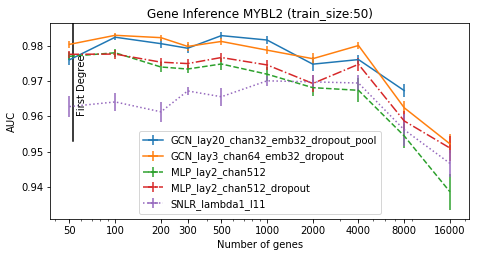

131


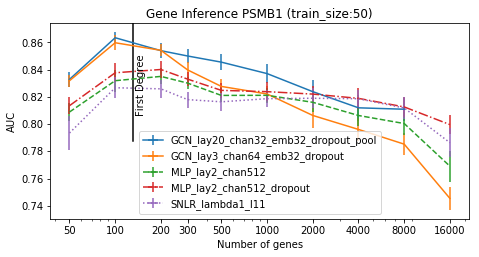

33


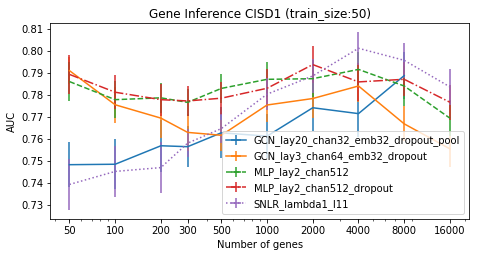

73


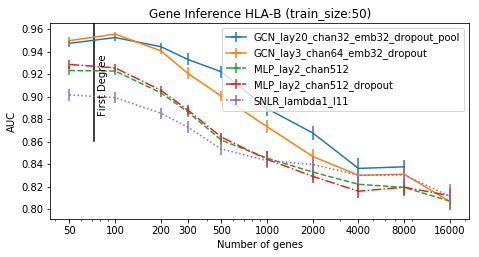

3


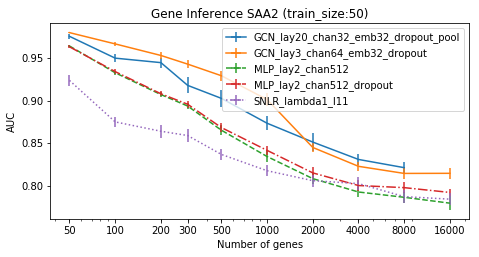

49


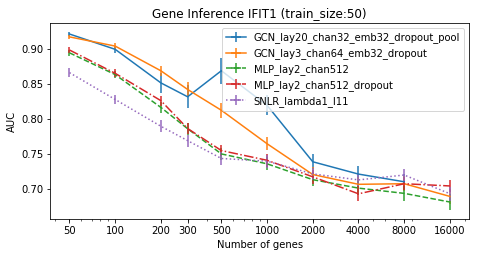

230


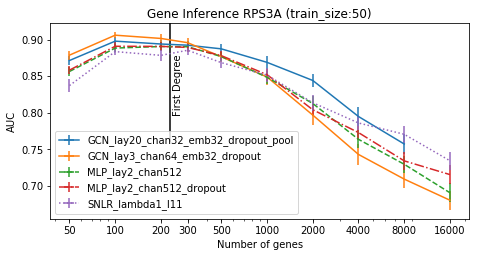

938


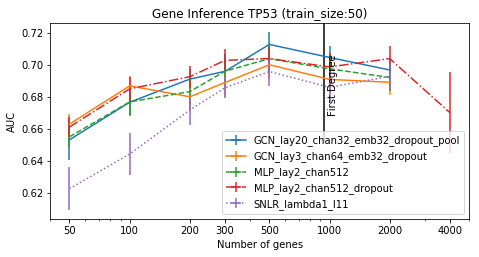

122


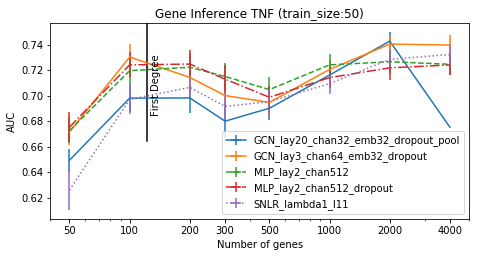

922


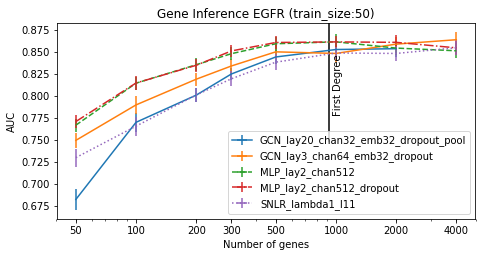

In [124]:
for plot_gene in genes.split("\n"):

    import pickle
    results = pickle.load(open("results_" + plot_gene + ".pkl" , "r"))


    %matplotlib inline
    plt.rcParams['figure.figsize'] = (7.5, 3.6)
    plot_train_size = 50

    subset = results["df"][(results["df"].train_size==plot_train_size) & 
                      (results["df"].gene_name==plot_gene) & 
                      (results["df"].num_genes!=400) &      
                      (results["df"].num_genes> 0)]


    q = subset.groupby(['model','num_genes'])['auc']

    #['CGN_2_layer_512_channel_emb_512_dropout', "MLP_2_chan512", "SLR2=lambda10-l1-1"]:
    #for model in ['CGN_2_layer_512_channel_emb_512_dropout', "MLP_2_chan512", "SLR2=lambda10-l1-1"]:

    todo = list(subset["model"].unique())
    if 'CGN_lay12_chan128_emb512_dropout_pool' in todo:
        todo.remove('CGN_lay12_chan128_emb512_dropout_pool')
    linestyles = ['-', '-', '--', '-.', ':']
    for ls, model in enumerate(sorted(todo)):
        index = list(q.mean()[model].index)
        mean = q.mean()[model]
        stderr = q.std()[model]/np.sqrt(q.count()[model])
        displayname = model.replace("CGN","GCN")
        displayname = displayname.replace("SLR", "SNLR")
        plt.errorbar(index, mean,label=displayname, xerr=0, yerr=stderr, ls=linestyles[ls])

    plt.title("Gene Inference " + plot_gene + " (train_size:" + str(plot_train_size) +")")
    plt.ylabel("AUC")
    plt.xlabel("Number of genes")
    plt.xscale("log")
    plt.xticks(sorted(subset["num_genes"].unique()))
    formatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_formatter(formatter)
    #plt.xlim(40,4500)
    
    plt.legend();
    fd = len(list(g.neighbors(plot_gene)))
    print fd
    if fd > 50:
        plt.axvline(fd, ymin=0.4, ymax=1.0, c="black")
        c = plt.ylim()
        plt.text(fd*1.05,c[1]-((c[1]-c[0])*0.2),'First Degree',rotation=90)
    
    
    
    plt.savefig("figs/sgi-" + plot_gene + "-" + "train" + str(plot_train_size) + ".png", bbox_inches='tight')
    plt.show()